# 🚢 Titanic Survival Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
"libraries imported successfully"

'libraries imported successfully'

### 2. Load the Dataset

In [2]:
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 3. Basic Exploration

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4. Handling Missing Data

Check for missing values

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Fill missing 'Age' with median

In [8]:
df["Age"]=df["Age"].fillna(df["Age"].median())

Fill missing 'Embarked' with mode

In [9]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

Drop 'Cabin' due to too many missing values

In [10]:
df.drop('Cabin',axis=1, inplace=True)

### 5. Drop Irrelevant Features

In [11]:
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

### 6. EDA: Survival Rate by Gender

Text(0.5, 1.0, 'Survival Rate by Gender')

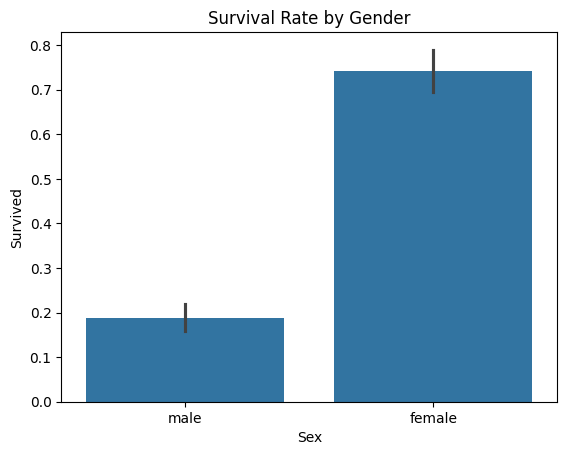

In [12]:
sns.barplot(x="Sex",y="Survived",data=df)
plt.title("Survival Rate by Gender")

### 7. EDA: Survival Rate by Passenger Class

Text(0.5, 1.0, 'Survival Rate by Passenger Class')

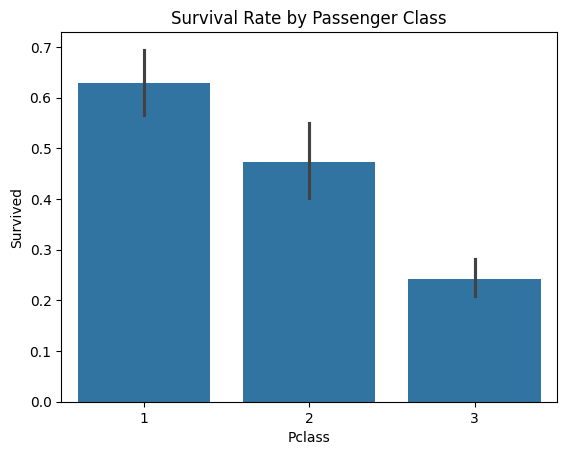

In [13]:
sns.barplot(x="Pclass",y="Survived",data=df)
plt.title("Survival Rate by Passenger Class")

### 8. Encode Categorical Variables

Machine learning models can't understand text. They need numbers.
So when you have categorical data like Sex = male/female or Embarked = C/Q/S, you need to convert those into numbers.

In [14]:
df=pd.get_dummies(df,columns=["Sex","Embarked"],drop_first=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True
887,1,1,19.0,0,0,30.0000,False,False,True
888,0,3,28.0,1,2,23.4500,False,False,True
889,1,1,26.0,0,0,30.0000,True,False,False


### 10. Correlation Heatmap

In [15]:
df.corr

<bound method DataFrame.corr of      Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0           0       3  22.0      1      0   7.2500      True       False   
1           1       1  38.0      1      0  71.2833     False       False   
2           1       3  26.0      0      0   7.9250     False       False   
3           1       1  35.0      1      0  53.1000     False       False   
4           0       3  35.0      0      0   8.0500      True       False   
..        ...     ...   ...    ...    ...      ...       ...         ...   
886         0       2  27.0      0      0  13.0000      True       False   
887         1       1  19.0      0      0  30.0000     False       False   
888         0       3  28.0      1      2  23.4500     False       False   
889         1       1  26.0      0      0  30.0000      True       False   
890         0       3  32.0      0      0   7.7500      True        True   

     Embarked_S  
0          True  
1         False  
2

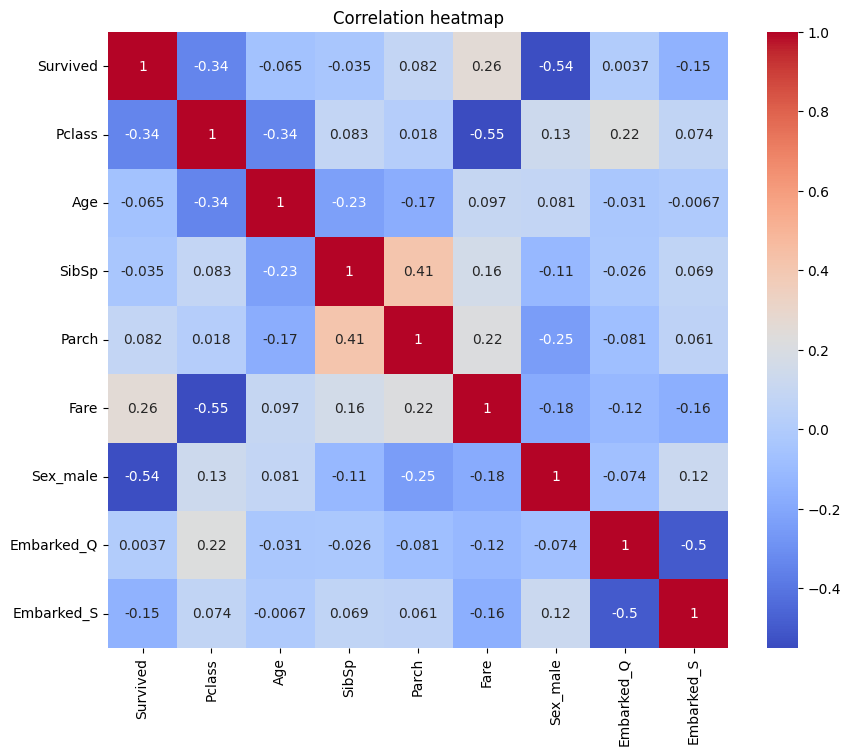

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title('Correlation heatmap')
plt.show()

1. Focus on the Survived row/column first

Survived vs Pclass = -0.34
That tells us:

As Pclass increases, Survived decreases


| Feature         | Correlation with `Survived` | Interpretation                                                                    |
| --------------- | --------------------------- | --------------------------------------------------------------------------------- |
| **Sex\_male**   | **-0.54**                   | Males had significantly **lower** survival chances (strong negative correlation). |
| **Pclass**      | **-0.34**                   | 3rd class passengers had **lower** survival.                                      |
| **Fare**        | **+0.26**                   | People who paid **more** had a better chance of surviving.                        |
| **Parch**       | +0.082                      | Having parents/children slightly increased survival.                              |
| **SibSp**       | -0.035                      | Very weak relationship.                                                           |
| **Embarked\_S** | -0.15                       | Slightly lower survival from Southampton.                                         |
| **Embarked\_Q** | \~0                         | No real effect.                                                                   |
| **Age**         | -0.065                      | Minimal negative effect.                                                          |


Look for High Correlations Between Input Features (Multicollinearity)

| Feature Pair                  | Correlation | Actionable Insight                                             |
| ----------------------------- | ----------- | -------------------------------------------------------------- |
| **SibSp & Parch**             | **+0.41**   | Related — maybe combine as `FamilySize`.                       |
| **Pclass & Fare**             | **-0.55**   | Strong negative — higher class paid more.                      |
| **Embarked\_Q & Embarked\_S** | -0.5        | These are one-hot dummies and naturally negatively correlated. |


## Hypothesis Testing

Does a passenger’s class (Pclass) affect their chance of survival?

In [17]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Survived'], df['Pclass'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-Value:", p)

# Interpret the p-value
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: Pclass affects survival.")
else:
    print("Fail to reject the null hypothesis: No evidence that Pclass affects survival.")

Chi-Square Statistic: 102.88898875696056
Degrees of Freedom: 2
P-Value: 4.549251711298793e-23
Reject the null hypothesis: Pclass affects survival.


Did having family onboard (SibSp, Parch) help increase survival odds?

In [20]:
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

# Drop NA just in case
df_clean = df.dropna(subset=['SibSp', 'Parch'])

# Split survival groups
survived = df_clean[df_clean['Survived'] == 1]
not_survived = df_clean[df_clean['Survived'] == 0]

# Mann-Whitney U Test for SibSp
u_stat_sibsp, p_sibsp = mannwhitneyu(survived['SibSp'], not_survived['SibSp'])
print("P-Value (SibSp vs Survival):", p_sibsp)
if p_sibsp < 0.05:
    print("Reject H₀ → SibSp affects survival.")
else:
    print("Fail to reject H₀ → No strong evidence SibSp affects survival.")

# Mann-Whitney U Test for Parch
u_stat_parch, p_parch = mannwhitneyu(survived['Parch'], not_survived['Parch'])
print("P-Value (Parch vs Survival):", p_parch)
if p_parch < 0.05:
    print("Reject H₀ → Parch affects survival.")
else:
    print("Fail to reject H₀ → No strong evidence Parch affects survival.")


P-Value (SibSp vs Survival): 0.008016684059168793
Reject H₀ → SibSp affects survival.
P-Value (Parch vs Survival): 3.712490908378456e-05
Reject H₀ → Parch affects survival.
